In [1]:
import numpy as np
import pylab as pl
import networkx as nx

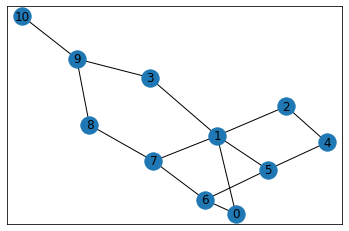

In [2]:
# Define and plot the graph
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), 
        (1, 3), (9, 10), (2, 4), (0, 6), (6, 7), 
        (8, 9), (7, 8), (1, 7), (3, 9)] 

goal = 10
G = nx.Graph() 
G.add_edges_from(edges) 
pos = nx.spring_layout(G) 
nx.draw_networkx_nodes(G, pos) 
nx.draw_networkx_edges(G, pos) 
nx.draw_networkx_labels(G, pos) 
pl.show() 

In [3]:
# Defining the reward system for robot salesman
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE))) 
M *= -1

for point in edges: 
    print(point) 
    if point[1] == goal: 
        M[point] = 100
    else: 
        M[point] = 0
    if point[0] == goal: 
        M[point[::-1]] = 100
    else: 
        M[point[::-1]]= 0
M[goal, goal]= 100
print(M)  

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


In [4]:
# Define the training functions
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE])) 

# parameter for learning 
gamma = 0.75
initial_state = 1

# Decide the available actions for a given state 
def available_actions(state): 
    current_state_row = M[state, ] 
    available_action = np.where(current_state_row >= 0)[1] 
    return available_action

available_action = available_actions(initial_state) 

# Chooses one of the available actions at random 
def sample_next_action(available_actions_range): 
    next_action = int(np.random.choice(available_action, 1)) 
    return next_action

action = sample_next_action(available_action) 

def update(current_state, action, gamma): 

    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1] 
    if max_index.shape[0] > 1: 
        max_index = int(np.random.choice(max_index, size = 1)) 
    else: 
        max_index = int(max_index) 
    max_value = Q[action, max_index] 
    Q[current_state, action] = M[current_state, action] + gamma * max_value 
    if (np.max(Q) > 0): 
        return(np.sum(Q / np.max(Q)*100)) 
    else: 
        return (0) 

# Updates the Q-Matrix according to the path chosen 
update(initial_state, action, gamma) 

0

Trained Q matrix:
[[  0.          42.18426595   0.           0.           0.
    0.          31.63819947   0.           0.           0.
    0.        ]
 [ 31.57873952   0.          31.57873952  56.24568794   0.
   31.63819947   0.          42.18426595   0.           0.
    0.        ]
 [  0.          42.18426595   0.           0.          23.7286496
    0.           0.           0.           0.           0.
    0.        ]
 [  0.          42.18426595   0.           0.           0.
    0.           0.           0.           0.          74.99425058
    0.        ]
 [  0.           0.          31.63819947   0.           0.
   31.63819947   0.           0.           0.           0.
    0.        ]
 [  0.          42.18426595   0.           0.          23.7286496
    0.          31.63819947   0.           0.           0.
    0.        ]
 [ 31.63819947   0.           0.           0.           0.
   31.63819947   0.          42.1875       0.           0.
    0.        ]
 [  0.          42.184

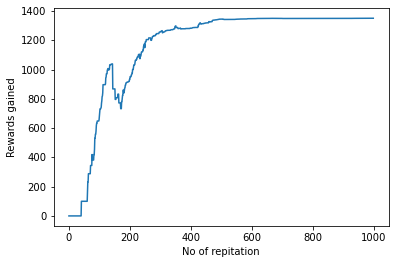

In [5]:
# Use Q-Matrix for training and evaluating the robot salesman
scores = [] 
for i in range(1000): 
    current_state = np.random.randint(0, int(Q.shape[0])) 
    available_action = available_actions(current_state) 
    action = sample_next_action(available_action) 
    score = update(current_state, action, gamma) 
    scores.append(score) 

# View the Q matrix
print("Trained Q matrix:") 
print(Q / np.max(Q)*100) 
 
# Testing the path
current_state = 0
steps = [current_state] 

while current_state != 10: 

    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1] 
    if next_step_index.shape[0] > 1: 
        next_step_index = int(np.random.choice(next_step_index, size = 1)) 
    else: 
        next_step_index = int(next_step_index) 
    steps.append(next_step_index) 
    current_state = next_step_index 

# Show the best path
print("Most efficient path for delivery:") 
print(steps) 

# Plot the graph
pl.plot(scores) 
pl.xlabel('No of repitation') 
pl.ylabel('Rewards gained') 
pl.show() 

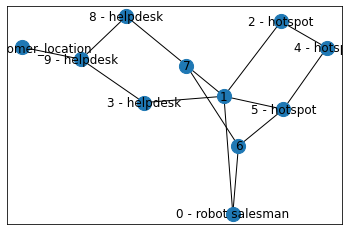

In [17]:
# Defining the locations of hotspot areas and the helpdesk counters 

hotspot = [2, 4, 5] 
helpdesk = [3, 8, 9] 

G = nx.Graph() 
G.add_edges_from(edges) 
mapping = {0:'0 - robot salesman', 1:'1', 2:'2 - hotspot', 3:'3 - helpdesk', 
           4:'4 - hotspot', 5:'5 - hotspot', 6:'6', 7:'7', 8:'8 - helpdesk', 
           9:'9 - helpdesk', 10:'10 - customer_location'} 

H = nx.relabel_nodes(G, mapping) 
pos = nx.spring_layout(H) 
nx.draw_networkx_nodes(H, pos, node_size =[200]) 
nx.draw_networkx_edges(H, pos) 
nx.draw_networkx_labels(H, pos) 
pl.show()

In [18]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE])) 
env_hotspot = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE])) 
env_helpdesk = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE])) 
initial_state = 1

 
def available_actions(state): 
    current_state_row = M[state, ] 
    av_action = np.where(current_state_row >= 0)[1] 
    return av_action 


def sample_next_action(available_actions_range): 
    next_action = int(np.random.choice(available_action, 1)) 
    return next_action 

# Exploring the environment 
def collect_environmental_data(action): 
    found = [] 
    if action in hotspot: 
        found.append('hs') 
    if action in helpdesk: 
        found.append('hd') 
    return (found) 


available_action = available_actions(initial_state) 
action = sample_next_action(available_action) 

def update(current_state, action, gamma): 
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1] 
    if max_index.shape[0] > 1: 
        max_index = int(np.random.choice(max_index, size = 1)) 
    else: 
        max_index = int(max_index) 
    max_value = Q[action, max_index] 
    Q[current_state, action] = M[current_state, action] + gamma * max_value 
    environment = collect_environmental_data(action) 
    if 'hs' in environment: 
        env_hotspot[current_state, action] += 1
    if 'hd' in environment: 
        env_helpdesk[current_state, action] += 1
    if (np.max(Q) > 0): 
        return(np.sum(Q / np.max(Q)*100)) 
    else: 
        return (0) 

update(initial_state, action, gamma) 

def available_actions_with_env_help(state): 
    current_state_row = M[state, ] 
    av_action = np.where(current_state_row >= 0)[1]
    
# In case of multiple routes, remove negative values
    env_pos_row = env_matrix_snap[state, av_action] 

    if (np.sum(env_pos_row < 0)): 
        
# Remove the negative directions from available action.
# Identifies the available actions according to the environment 
        temp_av_action = av_action[np.array(env_pos_row)[0]>= 0] 
        if len(temp_av_action) > 0: 
            av_action = temp_av_action 
    return av_action 

In [12]:
# Visualize the matrics environment
scores = [] 
for i in range(1000): 
    current_state = np.random.randint(0, int(Q.shape[0])) 
    available_action = available_actions(current_state) 
    action = sample_next_action(available_action) 
    score = update(current_state, action, gamma) 

# print environmental matrics 
print('Hotspot Found') 
print(env_hotspot) 
print('') 
print('Helpdesk Found') 
print(env_helpdesk) 

Hotspot Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 21.  0.  0. 20.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 37.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 57.  0.  0. 38.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 39.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 30.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Helpdesk Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 17.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 52.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 22.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 37.  0.]
 [ 0.  0.  0. 23.  0.  0.  0.

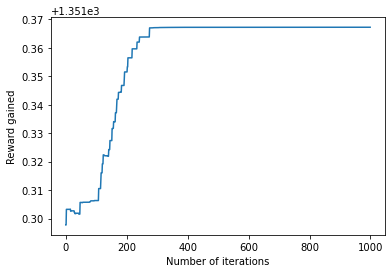

In [15]:
scores = []
for i in range(1000): 
    current_state = np.random.randint(0, int(Q.shape[0])) 
    available_action = available_actions(current_state) 
    action = sample_next_action(available_action) 
    score = update(current_state, action, gamma) 
    scores.append(score) 

# Plot the graph
pl.plot(scores) 
pl.xlabel('Number of iterations') 
pl.ylabel('Reward gained') 
pl.show() 